In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

## Gradient and Newton methods

### gradient descent

In [2]:
m = 200
n = 100
np.random.seed(1)
A = np.random.randn(m,n)
STOP = 1e-4

In [3]:
def gradient(x):
    df = A.T @ (1/(1 - A @ x)) + 2*x/(1 - x**2)
    return df

def f(x):
    return -np.sum(np.log(1 - A@x)) - np.sum(np.log(1 - x**2))

def in_domain(x):
    z = A@x
    flag = any(z >= 1) or any(np.abs(x) >= 1)
    return not flag

def Gradient_descent(initial_point, alpha, beta):
    def backtracking(fx, dfx, dx):
        t = 1
        while True:
            if in_domain(x + t*dx):
                if f(x + t*dx) < fx + alpha*t*np.dot(dfx,dx):
                    break
            t *= beta
        return t
    x = initial_point
    res = []
    step_size = []
    step = 0
    while True:
        res.append(f(x))
        df = gradient(x)
        print(f"iteration {step} : f(x) = {f(x)}, norm(df) = {np.linalg.norm(df)}")
        if np.linalg.norm(df) <= STOP:
            break
        dx = -df
        t = backtracking(f(x), df, dx)
        x += t*dx
        step_size.append(np.linalg.norm(t*dx))
        step += 1
    return res, step_size


In [25]:
res0, step_size0 = Gradient_descent(np.zeros((n,)), alpha = 0.01, beta = 0.2)

iteration 0 : f(x) = -0.0, norm(df) = 168.11540080822576
iteration 1 : f(x) = -35.88239519365236, norm(df) = 108.76040562687068
iteration 2 : f(x) = -52.87424150329221, norm(df) = 88.57554521475666
iteration 3 : f(x) = -97.96624019282105, norm(df) = 126.42132162473183
iteration 4 : f(x) = -98.56781232590818, norm(df) = 88.09877612671784
iteration 5 : f(x) = -106.82767574752857, norm(df) = 54.700177345785605
iteration 6 : f(x) = -111.23137174715669, norm(df) = 48.48563468129492
iteration 7 : f(x) = -114.81535891232217, norm(df) = 45.2981794425784
iteration 8 : f(x) = -128.93639944835118, norm(df) = 67.99039335028412
iteration 9 : f(x) = -130.92608840313665, norm(df) = 48.63393329975002
iteration 10 : f(x) = -133.88155644894817, norm(df) = 38.8604029884576
iteration 11 : f(x) = -136.10343234219206, norm(df) = 35.42411202786089
iteration 12 : f(x) = -145.11270339411294, norm(df) = 41.705441542296185
iteration 13 : f(x) = -146.81451297276826, norm(df) = 34.53210329646874
iteration 14 : f(x

iteration 231 : f(x) = -186.20719097919428, norm(df) = 0.006678471102025152
iteration 232 : f(x) = -186.20719103276923, norm(df) = 0.003704007153299425
iteration 233 : f(x) = -186.20719107464436, norm(df) = 0.005529404202483684
iteration 234 : f(x) = -186.2071911122047, norm(df) = 0.0032924925673446306
iteration 235 : f(x) = -186.20719115521644, norm(df) = 0.004626071456205407
iteration 236 : f(x) = -186.2071911821944, norm(df) = 0.002961771764153653
iteration 237 : f(x) = -186.20719122413072, norm(df) = 0.003915837438381902
iteration 238 : f(x) = -186.20719123067792, norm(df) = 0.006739607857180902
iteration 239 : f(x) = -186.20719128366846, norm(df) = 0.003358323716586305
iteration 240 : f(x) = -186.20719129954267, norm(df) = 0.0055067315582722895
iteration 241 : f(x) = -186.20719133550034, norm(df) = 0.0029201435838956537
iteration 242 : f(x) = -186.2071913560258, norm(df) = 0.004533815759028999
iteration 243 : f(x) = -186.2071913808901, norm(df) = 0.0025737904927256097
iteration 24

In [19]:
res1, step_size1 = Gradient_descent(np.zeros((n,)), alpha = 0.01, beta = 0.5)

iteration 0 : f(x) = -0.0, norm(df) = 168.11540080822576
iteration 1 : f(x) = -41.814074761886815, norm(df) = 100.63738095520448
iteration 2 : f(x) = -73.09387663691726, norm(df) = 102.47927458675991
iteration 3 : f(x) = -79.56455968369991, norm(df) = 86.21619007799704
iteration 4 : f(x) = -89.858487655528, norm(df) = 64.30487449532917
iteration 5 : f(x) = -101.48082537586295, norm(df) = 109.72062683827062
iteration 6 : f(x) = -102.5321543101409, norm(df) = 194.76997229051935
iteration 7 : f(x) = -106.24958307470095, norm(df) = 71.43117892702185
iteration 8 : f(x) = -116.07709296149972, norm(df) = 94.33435158735023
iteration 9 : f(x) = -119.72320342732014, norm(df) = 61.338007367531766
iteration 10 : f(x) = -123.61286401495842, norm(df) = 967.7400137347184
iteration 11 : f(x) = -125.73119624956502, norm(df) = 68.92504497309682
iteration 12 : f(x) = -131.17619412331157, norm(df) = 43.098188160994546
iteration 13 : f(x) = -136.62311929984799, norm(df) = 46.845701611886575
iteration 14 : 

iteration 244 : f(x) = -186.20710155396645, norm(df) = 0.06686192693311761
iteration 245 : f(x) = -186.20710571346706, norm(df) = 0.03933377762295791
iteration 246 : f(x) = -186.20710711796238, norm(df) = 0.10440283455359964
iteration 247 : f(x) = -186.20711498850693, norm(df) = 0.04868735260476233
iteration 248 : f(x) = -186.2071164834022, norm(df) = 0.07295876475936751
iteration 249 : f(x) = -186.2071208959702, norm(df) = 0.03882022879620847
iteration 250 : f(x) = -186.20712330926006, norm(df) = 0.05288239672462287
iteration 251 : f(x) = -186.2071235922559, norm(df) = 0.08275710794342968
iteration 252 : f(x) = -186.20712881561101, norm(df) = 0.04036439731330428
iteration 253 : f(x) = -186.20713050950803, norm(df) = 0.058162805963786306
iteration 254 : f(x) = -186.20713354370255, norm(df) = 0.03303505912974546
iteration 255 : f(x) = -186.20713381206542, norm(df) = 0.09113976282698275
iteration 256 : f(x) = -186.20713973746567, norm(df) = 0.0414420443363468
iteration 257 : f(x) = -186.

iteration 417 : f(x) = -186.20719168017058, norm(df) = 0.0012974689480661358
iteration 418 : f(x) = -186.2071916811772, norm(df) = 0.001949224928674837
iteration 419 : f(x) = -186.20719168431734, norm(df) = 0.0010317599123441134
iteration 420 : f(x) = -186.2071916860014, norm(df) = 0.0014086721799422993
iteration 421 : f(x) = -186.20719168617694, norm(df) = 0.0022094996183023505
iteration 422 : f(x) = -186.2071916898825, norm(df) = 0.001077811675100371
iteration 423 : f(x) = -186.20719169106303, norm(df) = 0.0015581269243550638
iteration 424 : f(x) = -186.20719169322814, norm(df) = 0.000882700511765553
iteration 425 : f(x) = -186.20719169333833, norm(df) = 0.00245482325833054
iteration 426 : f(x) = -186.20719169761145, norm(df) = 0.001116173351903646
iteration 427 : f(x) = -186.20719169817005, norm(df) = 0.00169883927733101
iteration 428 : f(x) = -186.20719170049483, norm(df) = 0.0008778403281353486
iteration 429 : f(x) = -186.20719170159316, norm(df) = 0.0012184623336659983
iteration 

In [21]:
res2, step_size2 = Gradient_descent(np.zeros((n,)), alpha = 0.01, beta = 0.7)

iteration 0 : f(x) = -0.0, norm(df) = 168.11540080822576
iteration 1 : f(x) = -58.563981638105865, norm(df) = 115.4363957751509
iteration 2 : f(x) = -69.62123586747637, norm(df) = 96.31024990721995
iteration 3 : f(x) = -84.87668879234187, norm(df) = 331.7916994900645
iteration 4 : f(x) = -86.41473809334444, norm(df) = 82.74106867366018
iteration 5 : f(x) = -99.83115106860608, norm(df) = 70.62908245143801
iteration 6 : f(x) = -108.0977935961385, norm(df) = 70.69126076085938
iteration 7 : f(x) = -110.5047423137394, norm(df) = 5921.196130496915
iteration 8 : f(x) = -115.18415270424515, norm(df) = 75.43741824009808
iteration 9 : f(x) = -120.63611263435342, norm(df) = 51.874254389825204
iteration 10 : f(x) = -127.21067905866627, norm(df) = 122.84705043169149
iteration 11 : f(x) = -128.889848288282, norm(df) = 98.04534878434703
iteration 12 : f(x) = -130.32509405646786, norm(df) = 153.39144484458077
iteration 13 : f(x) = -130.9617802048699, norm(df) = 73.47623796368198
iteration 14 : f(x) = 

iteration 193 : f(x) = -186.20449265075405, norm(df) = 0.5203025459036362
iteration 194 : f(x) = -186.20467377122642, norm(df) = 0.3583657262919007
iteration 195 : f(x) = -186.20472606012467, norm(df) = 0.45036460612050494
iteration 196 : f(x) = -186.20473332384006, norm(df) = 0.5855897453663206
iteration 197 : f(x) = -186.20492710861356, norm(df) = 0.40017744867271293
iteration 198 : f(x) = -186.20494883408568, norm(df) = 0.5165237525819987
iteration 199 : f(x) = -186.20510847020273, norm(df) = 0.35606200216293954
iteration 200 : f(x) = -186.20514026028525, norm(df) = 0.45573839764207746
iteration 201 : f(x) = -186.2052726008661, norm(df) = 0.3174257342361928
iteration 202 : f(x) = -186.20531110390064, norm(df) = 0.40241648883432474
iteration 203 : f(x) = -186.20542159678524, norm(df) = 0.28371766859970116
iteration 204 : f(x) = -186.20546425822084, norm(df) = 0.35580986762437655
iteration 205 : f(x) = -186.2054749404303, norm(df) = 0.4569201326809862
iteration 206 : f(x) = -186.20560

iteration 315 : f(x) = -186.20716266143148, norm(df) = 0.05106947048311982
iteration 316 : f(x) = -186.2071643886377, norm(df) = 0.03549542951520892
iteration 317 : f(x) = -186.20716492631928, norm(df) = 0.044729646548806616
iteration 318 : f(x) = -186.2071663557238, norm(df) = 0.03158761200098006
iteration 319 : f(x) = -186.2071669583856, norm(df) = 0.03931647016494996
iteration 320 : f(x) = -186.20716720128019, norm(df) = 0.050501770124623944
iteration 321 : f(x) = -186.20716879112084, norm(df) = 0.034758485799131676
iteration 322 : f(x) = -186.20716915055036, norm(df) = 0.044224051586830994
iteration 323 : f(x) = -186.20717045780336, norm(df) = 0.030857862389522473
iteration 324 : f(x) = -186.2071708923649, norm(df) = 0.03883261631429607
iteration 325 : f(x) = -186.2071709664482, norm(df) = 0.05019417585273972
iteration 326 : f(x) = -186.20717246272696, norm(df) = 0.03414845153530938
iteration 327 : f(x) = -186.20717266968964, norm(df) = 0.04376865511708218
iteration 328 : f(x) = -1

iteration 427 : f(x) = -186.20719119210685, norm(df) = 0.005281772733030814
iteration 428 : f(x) = -186.20719120050163, norm(df) = 0.006717511281662329
iteration 429 : f(x) = -186.20719123078402, norm(df) = 0.004688347437349197
iteration 430 : f(x) = -186.20719124096024, norm(df) = 0.005896733746203786
iteration 431 : f(x) = -186.20719124289414, norm(df) = 0.007622637278616375
iteration 432 : f(x) = -186.20719127742774, norm(df) = 0.005192804536983128
iteration 433 : f(x) = -186.2071912823966, norm(df) = 0.006655748677940646
iteration 434 : f(x) = -186.20719131049094, norm(df) = 0.0045915650505913425
iteration 435 : f(x) = -186.20719131748652, norm(df) = 0.005826837783632335
iteration 436 : f(x) = -186.20719134063015, norm(df) = 0.004078748639611342
iteration 437 : f(x) = -186.20719134891743, norm(df) = 0.005117047844830939
iteration 438 : f(x) = -186.20719135103087, norm(df) = 0.0066046966001859905
iteration 439 : f(x) = -186.20719137726826, norm(df) = 0.00451109698414365
iteration 44

iteration 541 : f(x) = -186.2071917256171, norm(df) = 0.0008947880266549714
iteration 542 : f(x) = -186.20719172617592, norm(df) = 0.0006295284852473661
iteration 543 : f(x) = -186.20719172639542, norm(df) = 0.0007867898654150643
iteration 544 : f(x) = -186.20719172646972, norm(df) = 0.0010128798401453471
iteration 545 : f(x) = -186.20719172709957, norm(df) = 0.0006944867230303738
iteration 546 : f(x) = -186.2071917272244, norm(df) = 0.0008858006012557258
iteration 547 : f(x) = -186.2071917277405, norm(df) = 0.0006156860790829837
iteration 548 : f(x) = -186.20719172789842, norm(df) = 0.0007768866371895162
iteration 549 : f(x) = -186.20719172832673, norm(df) = 0.0005485114759230958
iteration 550 : f(x) = -186.20719172850505, norm(df) = 0.0006836649389588672
iteration 551 : f(x) = -186.20719172857423, norm(df) = 0.0008784824232287638
iteration 552 : f(x) = -186.20719172905476, norm(df) = 0.0006039710006730162
iteration 553 : f(x) = -186.20719172916085, norm(df) = 0.0007686748231835654
it

In [23]:
res3, step_size3 = Gradient_descent(np.zeros((n,)), alpha = 0.01, beta = 0.9)

iteration 0 : f(x) = -0.0, norm(df) = 168.11540080822576
iteration 1 : f(x) = -59.217855504355576, norm(df) = 527.5672541515169
iteration 2 : f(x) = -61.174684192157216, norm(df) = 111.49827660942594
iteration 3 : f(x) = -76.71637254049492, norm(df) = 2642.3811863024594
iteration 4 : f(x) = -79.25897721868347, norm(df) = 256.12541295540956
iteration 5 : f(x) = -81.00673073746827, norm(df) = 161.95536535032525
iteration 6 : f(x) = -85.16325676664344, norm(df) = 149.6692881046758
iteration 7 : f(x) = -90.01971460990737, norm(df) = 182.86497689369727
iteration 8 : f(x) = -97.16379636230997, norm(df) = 198.70632342314704
iteration 9 : f(x) = -102.8051105786877, norm(df) = 201.79750808009118
iteration 10 : f(x) = -108.07189550587557, norm(df) = 211.92142576777167
iteration 11 : f(x) = -111.06197056193386, norm(df) = 144.70861811675547
iteration 12 : f(x) = -112.24174407245839, norm(df) = 202.9892129256654
iteration 13 : f(x) = -114.99705088442232, norm(df) = 612.1464855915142
iteration 14 :

iteration 122 : f(x) = -186.1425873269268, norm(df) = 4.779343210378254
iteration 123 : f(x) = -186.14386442201047, norm(df) = 4.397480008641666
iteration 124 : f(x) = -186.14585374674817, norm(df) = 4.981120173429342
iteration 125 : f(x) = -186.14671132166194, norm(df) = 4.5795540451437065
iteration 126 : f(x) = -186.1486022978505, norm(df) = 5.192521731995465
iteration 127 : f(x) = -186.1548553542007, norm(df) = 3.9492553546816715
iteration 128 : f(x) = -186.15626776019394, norm(df) = 4.476537880640733
iteration 129 : f(x) = -186.15718035534712, norm(df) = 4.128505363813704
iteration 130 : f(x) = -186.15837328130985, norm(df) = 4.69404657552937
iteration 131 : f(x) = -186.16372286276882, norm(df) = 3.5727213772556095
iteration 132 : f(x) = -186.16463845880813, norm(df) = 4.059839054292321
iteration 133 : f(x) = -186.1655468092925, norm(df) = 3.7533114707504955
iteration 134 : f(x) = -186.1662659329048, norm(df) = 4.2773200199431844
iteration 135 : f(x) = -186.16689501944015, norm(df)

iteration 244 : f(x) = -186.20671704715224, norm(df) = 0.2720773559612948
iteration 245 : f(x) = -186.2067373793197, norm(df) = 0.2547726718569406
iteration 246 : f(x) = -186.206740240928, norm(df) = 0.2893543880931639
iteration 247 : f(x) = -186.20676029918687, norm(df) = 0.27077832045209055
iteration 248 : f(x) = -186.2067804280429, norm(df) = 0.2531260975065662
iteration 249 : f(x) = -186.2067980436617, norm(df) = 0.23702868177396277
iteration 250 : f(x) = -186.20680046310585, norm(df) = 0.2691969666204835
iteration 251 : f(x) = -186.2068178547903, norm(df) = 0.25191610839091827
iteration 252 : f(x) = -186.20683522018587, norm(df) = 0.23551768956579502
iteration 253 : f(x) = -186.20685048648818, norm(df) = 0.220541852308284
iteration 254 : f(x) = -186.2068525376367, norm(df) = 0.25046767991387453
iteration 255 : f(x) = -186.20686762047603, norm(df) = 0.2343901999614586
iteration 256 : f(x) = -186.20688261014922, norm(df) = 0.21915360206724124
iteration 257 : f(x) = -186.206895843919

iteration 383 : f(x) = -186.207187986065, norm(df) = 0.023920692863958003
iteration 384 : f(x) = -186.20718814566948, norm(df) = 0.022398860171518306
iteration 385 : f(x) = -186.20718829445573, norm(df) = 0.020984739254503466
iteration 386 : f(x) = -186.20718831884767, norm(df) = 0.02380261120332499
iteration 387 : f(x) = -186.20718846651243, norm(df) = 0.02228316865205604
iteration 388 : f(x) = -186.20718860540612, norm(df) = 0.02086610124424051
iteration 389 : f(x) = -186.20718873495304, norm(df) = 0.019549178418357824
iteration 390 : f(x) = -186.20718875658582, norm(df) = 0.02217305227112451
iteration 391 : f(x) = -186.20718888513852, norm(df) = 0.02075801428486335
iteration 392 : f(x) = -186.2071890060219, norm(df) = 0.019438479501516653
iteration 393 : f(x) = -186.20718901757957, norm(df) = 0.022066455856202115
iteration 394 : f(x) = -186.2071891381893, norm(df) = 0.02064935370425888
iteration 395 : f(x) = -186.20718925008953, norm(df) = 0.0193319561136276
iteration 396 : f(x) = -

iteration 502 : f(x) = -186.20719167004043, norm(df) = 0.0030464779425024608
iteration 503 : f(x) = -186.20719167275945, norm(df) = 0.002854013411033477
iteration 504 : f(x) = -186.20719167316062, norm(df) = 0.0032379797522991225
iteration 505 : f(x) = -186.20719167586535, norm(df) = 0.003031171577852673
iteration 506 : f(x) = -186.20719167839675, norm(df) = 0.002838572015930674
iteration 507 : f(x) = -186.20719168076812, norm(df) = 0.002659319447056095
iteration 508 : f(x) = -186.20719168112913, norm(df) = 0.003016862604735561
iteration 509 : f(x) = -186.20719168348737, norm(df) = 0.00282424612601993
iteration 510 : f(x) = -186.20719168569477, norm(df) = 0.0026448682903973245
iteration 511 : f(x) = -186.20719168776304, norm(df) = 0.0024779208434291527
iteration 512 : f(x) = -186.20719168808768, norm(df) = 0.0028108579565333976
iteration 513 : f(x) = -186.20719169014393, norm(df) = 0.0026314593757031848
iteration 514 : f(x) = -186.20719169206885, norm(df) = 0.002464395526332431
iterati

iteration 629 : f(x) = -186.2071917352139, norm(df) = 0.00041100079092569426
iteration 630 : f(x) = -186.2071917352558, norm(df) = 0.00038467322687303526
iteration 631 : f(x) = -186.20719173529497, norm(df) = 0.0003601586960241519
iteration 632 : f(x) = -186.20719173533158, norm(df) = 0.00033733502502073616
iteration 633 : f(x) = -186.2071917353356, norm(df) = 0.000382948628174325
iteration 634 : f(x) = -186.20719173537216, norm(df) = 0.0003584277510214019
iteration 635 : f(x) = -186.20719173540635, norm(df) = 0.0003355957616650572
iteration 636 : f(x) = -186.20719173543836, norm(df) = 0.00031433894359180164
iteration 637 : f(x) = -186.207191735442, norm(df) = 0.0003568123591623483
iteration 638 : f(x) = -186.20719173547394, norm(df) = 0.00033397420713650897
iteration 639 : f(x) = -186.20719173550373, norm(df) = 0.0003127093029463209
iteration 640 : f(x) = -186.20719173553167, norm(df) = 0.00029291179551935425
iteration 641 : f(x) = -186.20719173553502, norm(df) = 0.0003324610438276101

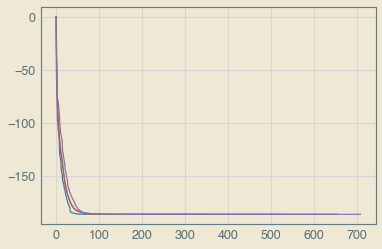

In [27]:
plt.plot(np.arange(1, len(res0)+1, 1), res0, label = "alpha = 0.01, beta = 0.2")
plt.plot(np.arange(1, len(res1)+1, 1), res1, label = "alpha = 0.01, beta = 0.5")
plt.plot(np.arange(1, len(res2)+1, 1), res2, label = "alpha = 0.01, beta = 0.7")
plt.plot(np.arange(1, len(res3)+1, 1), res3, label = "alpha = 0.01, beta = 0.9")

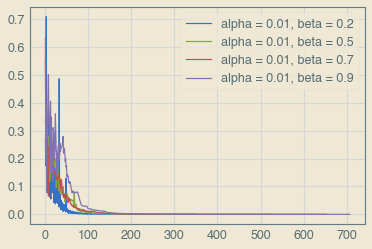

In [31]:
plt.plot(np.arange(1, len(res0), 1), step_size0, label="alpha = 0.01, beta = 0.2")
plt.plot(np.arange(1, len(res1), 1), step_size1, label="alpha = 0.01, beta = 0.5")
plt.plot(np.arange(1, len(res2), 1), step_size2, label="alpha = 0.01, beta = 0.7")
plt.plot(np.arange(1, len(res3), 1), step_size3, label="alpha = 0.01, beta = 0.9")
plt.legend()

### Newton method

In [17]:
def Hessian(x):
    return A.T.dot(np.diag(1/((1-A.dot(x))**2).squeeze())).dot(A) + np.diag((1/((1-x)**2) + 1/((1+x)**2)).squeeze())
def Newton_method(initial, alpha=0.01, beta=0.5):
    def backtracking(fx, dfx, dx):
        t = 1
        while True:
            if in_domain(x + t*dx):
                if f(x + t*dx) < fx + alpha*t*np.dot(dfx,dx):
                    break
            t *= beta
        return t
    def lmd_square(dfx, hess_inv):
        return dfx.T@hess_inv@dfx
    x = initial
    res = []
    step = 0
    while True:
        fx = f(x)
        dfx = gradient(x)
        hess_inv = np.linalg.inv(Hessian(x))
        lmd_2 = lmd_square(dfx, hess_inv) 
        if lmd_2 <= 2*STOP:
            break
        dx = -hess_inv@dfx
        t = backtracking(fx, dfx, dx)
        x += t*dx
        res.append(fx)
        step += 1
        print(f"iteration {step} : f(x) = {fx}, lmd**2 = {lmd_2}")
    return res

In [18]:
res = Newton_method(np.zeros((n,)))

iteration 1 : f(x) = -0.0, lmd**2 = 117.51245016541498
iteration 2 : f(x) = -77.1067279910583, lmd**2 = 106.87684570370061
iteration 3 : f(x) = -149.18955123328675, lmd**2 = 64.53631157299961
iteration 4 : f(x) = -173.8243794503472, lmd**2 = 23.345945767416605
iteration 5 : f(x) = -184.00542188882628, lmd**2 = 2.4254203549452957
iteration 6 : f(x) = -185.49279414656846, lmd**2 = 0.8506169876011427
iteration 7 : f(x) = -186.02799864488333, lmd**2 = 0.27518185134597256
iteration 8 : f(x) = -186.1903809069211, lmd**2 = 0.031145160715311523
iteration 9 : f(x) = -186.2070024937187, lmd**2 = 0.00037534132413647413


Text(0.5, 1.0, "Newton's Method")

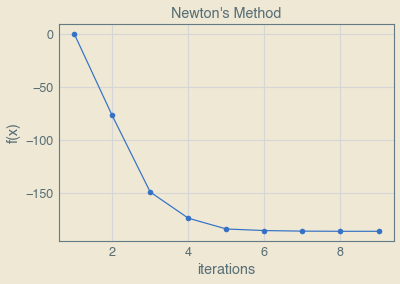

In [21]:
plt.plot(np.arange(1, len(res)+1, 1), res, "o-")
plt.xlabel("iterations")
plt.ylabel("f(x)")
plt.title("Newton's Method")

## Efficient solution of basic portfolio optimization problem

## Sizing a gravity feed water supply network 

In [2]:
from hw9_script import syntesize_waterflow_data
alpha, Rmin, Rmax, Smax, C, L, h, A \
    ,num_nodes, num_edge, num_producers, num_scenarios = syntesize_waterflow_data()

In [10]:
print(C.shape)
print(num_producers)

(7, 10)
3


In [21]:
z = cp.Variable((num_edge, 1), pos=True)
s = cp.Variable((num_producers, num_scenarios), pos=True)
f = cp.Variable((num_edge, num_scenarios), pos=True)
D1 = -alpha*np.diag((A.T@h).flatten())*np.diag((1/L).flatten())
obj = cp.Minimize(L.T@z)
constraints = [
    cp.square(Rmin) <= z,
    z <= cp.square(Rmax),
]
for i in range(num_scenarios):
    constraints+=[
        A@f[:, i] == cp.hstack([-s[:,i], C[:,i]]),
        s[:, i][:, np.newaxis] <= Smax,
        f[:, i][:, np.newaxis] <= D1@z,
    ]

In [22]:
prob = cp.Problem(obj, constraints)
prob.solve()
print(prob.status)

optimal


In [23]:
print(prob.value)

325.73432242688006


In [30]:
print("optimal pipe radius")
print((cp.sqrt(z.value)).value)

optimal pipe radius
[[0.5       ]
 [0.5       ]
 [2.5       ]
 [1.26400327]
 [0.5       ]
 [0.5       ]
 [2.42374079]
 [0.5       ]
 [0.5       ]
 [1.48903743]
 [2.3036746 ]
 [2.5       ]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [1.83125861]
 [1.16311128]
 [2.04036402]
 [1.72212477]
 [0.5       ]]


## Flux balance analysis in systems biology

In [2]:
from hw9_script import synt_flux_fba_data
S, vmax, m, n = synt_flux_fba_data()

In [5]:
v = cp.Variable(n)
constraints = [
    S @ v == 0,
    0 <= v, v <= vmax,
]
prob = cp.Problem(cp.Maximize(v[-1]), constraints)
prob.solve()
prob.status

'optimal'

In [6]:
print("maximum cell growth rate", prob.value)

maximum cell growth rate 13.54999999695169


In [10]:
for i in range(len(constraints)):
    print(constraints[i].dual_value)

[-5.00000001e-01 -5.00000001e-01 -1.00000000e+00 -1.00000000e+00
 -1.50000000e+00 -1.18349672e-09]
[7.44853664e-11 1.62732105e-10 1.54649630e-10 1.46902895e-10
 1.50195372e-10 1.28102218e-09 1.26940749e-10 1.19040689e-09
 6.41316472e-11]
[5.00000002e-01 7.10287005e-12 4.99999999e-01 8.52981304e-12
 1.50000000e+00 7.32553008e-12 7.16424880e-12 6.89826960e-12
 7.82565500e-12]


In [11]:
G_star = prob.value

In [13]:
essential = []
non_essential = []
for i in range(n):
    new_prob = cp.Problem(cp.Maximize(v[-1]), constraints+[v[i] == 0])
    new_prob.solve()
    if new_prob.value <= 0.2*G_star:
        essential.append(i)
        print(f"gene {i} is essential, new_G = {new_prob.value}")
    else:
        non_essential.append(i)
        print(f"gene {i} is essential, new_G = {new_prob.value}")

gene 0 is essential, new_G = 6.26230792440507e-11
gene 1 is not essential, new_G = 5.899999999884803
gene 2 is not essential, new_G = 10.599999996523048
gene 3 is not essential, new_G = 7.999999999923284
gene 4 is not essential, new_G = 7.99999999992338
gene 5 is not essential, new_G = 13.299999999347245
gene 6 is not essential, new_G = 7.400000000077997
gene 7 is not essential, new_G = 13.299999999348842
gene 8 is essential, new_G = -3.4330717191332335e-13


In [18]:
synthetic_lethal = []
for i in range(len(non_essential)-1):
    for j in range(i+1, len(non_essential)):
        pair_i = non_essential[i]
        pair_j = non_essential[j]
        new_prob = cp.Problem(cp.Maximize(v[-1]), 
                              constraints+[v[pair_i] == 0, v[pair_j] == 0])
        new_prob.solve()
        if new_prob.value <= 0.2*G_star:
            synthetic_lethal.append((pair_i, pair_j))
            print(f"gene {pair_i} and gene {pair_j} are synthetic lethal\
            new_G:{new_prob.value}")


gene 1 and gene 2 are synthetic lethal            new_G:-1.381174859762067e-11
gene 1 and gene 6 are synthetic lethal            new_G:3.1206553206254114e-11
gene 3 and gene 6 are synthetic lethal            new_G:-7.67190359182305e-14
gene 4 and gene 6 are synthetic lethal            new_G:-7.207394004360236e-14


## Online advertising displays

In [2]:
from hw9_script import synt_online_ad_displays
Acontr, Tcontr, I, R, q, p, n, m, T\
    = synt_online_ad_displays()

In [30]:
N = cp.Variable((n, T), pos=True)
constraints = [
    cp.sum(N, 0)==I.flatten()
]
s = cp.pos(q.flatten() - cp.diag(Acontr.T@N@Tcontr))
penalty = p.T@s
obj = cp.Maximize(cp.sum(cp.multiply(R,N))-penalty)
prob = cp.Problem(obj, constraints)
prob.solve()
prob.status

'optimal'

In [33]:
print("optimal strategy")
print(f"optimal net profit : {prob.value}")
print(f"revenue: {np.sum(R*N.value)}")
print(f"penalty: {penalty.value[0]}")

optimal strategy
optimal net profit : 259.00083556096064
revenue: 280.94172210611595
penalty: 21.94088653867885


In [3]:
N = cp.Variable((n, T), pos=True)
constraints = [
    cp.sum(N, 0)==I.flatten()
]
s = cp.pos(q.flatten() - cp.diag(Acontr.T@N@Tcontr))
penalty = p.T@s
obj = cp.Maximize(cp.sum(cp.multiply(R, N)))
prob = cp.Problem(obj, constraints)
prob.solve()
prob.status

'optimal'

In [4]:
print("greedy strategy")
print(f"optimal net profit : {prob.value-penalty.value[0]}")
print(f"revenue: {np.sum(R*N.value)}")
print(f"penalty: {penalty.value[0]}")

greedy strategy
optimal net profit : 146.87805937699045
revenue: 306.3653618781776
penalty: 159.48730250118587


## Ranking by aggregating preferences

In [5]:
from hw9_script import synt_rank_aggr_data
preferences, n, m = synt_rank_aggr_data()

In [13]:
preferences.shape

(1000, 2)

In [28]:
r = cp.Variable(n, pos=True)
v = cp.pos(r[preferences[:, 1]] - r[preferences[:, 0]] + 1)
J_l2 = cp.sum_squares(v)
J_l1 = cp.sum(v)
prob1 = cp.Problem(cp.Minimize(J_l2))
prob2 = cp.Problem(cp.Minimize(J_l1))

In [29]:
prob1.solve()
prob1.status

'optimal'

total violations : 781


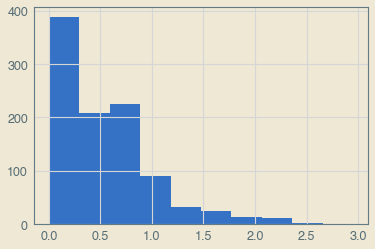

In [30]:
plt.hist(v.value)
print(f"total violations : {sum(v.value > 1e-3)}")

In [31]:
prob2.solve()
prob2.status

'optimal'

total violations : 235


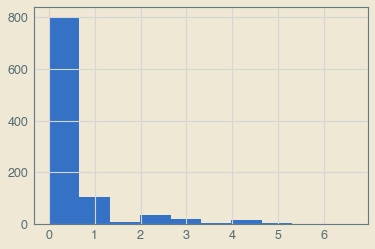

In [32]:
plt.hist(v.value)
print(f"total violations : {sum(v.value > 1e-3)}")